In [14]:
import ares
import numpy as np
import matplotlib.pyplot as pl

In [2]:
blobs_scalar = ['z_D', 'dTb_D', 'tau_e']


In [3]:
blobs_1d = ['cgm_h_2', 'igm_Tk', 'dTb']
#freqs = np.arange(1e6, 300e6, 300)
blobs_1d_z = np.arange(4, 250)
blobs_1d_z = 1420e6/np.arange(50e6, 250e6, 1e6)-1


In [4]:
base_pars = \
{
 'problem_type': 101,
 'tanh_model': False,
 'blob_names': [blobs_scalar, blobs_1d],
 'blob_ivars': [None, [('z', blobs_1d_z)]],
 'blob_funcs': None,
}

Parameters to run
* f_X
* f_*
* nu_X
* N_{HI}
* Nion


In [5]:
refvals = {'Nlw': 1e4, 'Nion': 4e3, 'fX': 0.2, 'fstar': 0.01}


In [6]:
mg = ares.inference.ModelGrid(**base_pars)

axes = {'Nlw':np.array([1e1, 1e3, 1e4, 1e5, 1e6]), 'Nion':np.hstack([np.array([1e3, .5e4]),np.linspace(1e4, 1e5, 6)]), 'fX':np.logspace(-2, 3, 8), 
        'fstar':np.logspace(np.log10(5e-3), np.log10(5e-1), 5), 'Tmin':np.logspace(4, np.log10(5e6), 8)}
mg.axes = axes

In [7]:
#import os
#thisdir = os.getcwd()
#import glob
#pickles=glob.glob(thisdir+'/*.pkl')
#for pk in pickles:
#    os.remove(pk)


In [8]:
mg.run('test_2d_grid', clobber=True)


Starting 12800-element model grid.
Running 12800-element model grid.
Checkpoint #1: Tue Oct 13 15:15:57 2020
Checkpoint #2: Tue Oct 13 15:49:48 2020
Checkpoint #3: Tue Oct 13 16:24:52 2020
Checkpoint #4: Tue Oct 13 16:59:12 2020
Checkpoint #5: Tue Oct 13 17:34:18 2020
Checkpoint #6: Tue Oct 13 18:07:34 2020
Checkpoint #7: Tue Oct 13 18:40:32 2020
Checkpoint #8: Tue Oct 13 19:14:35 2020
Checkpoint #9: Tue Oct 13 19:48:38 2020
Checkpoint #10: Tue Oct 13 20:23:13 2020
Checkpoint #11: Tue Oct 13 20:56:08 2020
Checkpoint #12: Tue Oct 13 21:29:49 2020
Checkpoint #13: Tue Oct 13 22:03:42 2020
Checkpoint #14: Tue Oct 13 22:38:14 2020
Checkpoint #15: Tue Oct 13 23:12:35 2020
Checkpoint #16: Tue Oct 13 23:45:57 2020
Checkpoint #17: Wed Oct 14 00:19:38 2020
Checkpoint #18: Wed Oct 14 00:53:10 2020
Checkpoint #19: Wed Oct 14 01:27:28 2020
Checkpoint #20: Wed Oct 14 02:01:46 2020
Checkpoint #21: Wed Oct 14 02:35:28 2020
Checkpoint #22: Wed Oct 14 03:08:45 2020
Checkpoint #23: Wed Oct 14 03:42:36 20

In [9]:
anl = ares.analysis.ModelSet('test_2d_grid')
#pl.plot(1420.2/(1+blobs_1d_z), anl.get_blob_from_disk('dTb').T)


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ./                                                                                     ####
#### prefix      : test_2d_grid                                                                           ####
#### N-d         : 5                                                                                      ####


discord taue inconsistent with reionization.

In [10]:
tau_e = anl.get_blob_from_disk('tau_e')
exclude = (tau_e >= 0.082) | (tau_e <= 0.066)

# Loaded test_2d_grid.000.blob_0d.tau_e.pkl


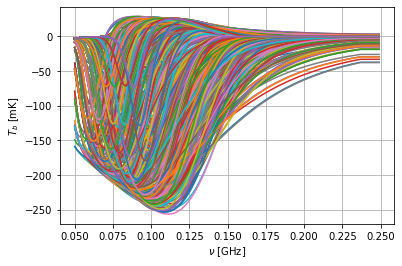

In [15]:
pl.plot(1.4202/(1+blobs_1d_z), anl.get_blob_from_disk('dTb')[~exclude].T)
pl.ylabel('$T_b$ [mK]')
pl.xlabel('$\\nu$ [GHz]')
pl.grid()

In [16]:
np.count_nonzero(~exclude)
freqs = 1.4201 / (1+blobs_1d_z)

In [17]:
np.savez('models_21cm.npz', models=anl.get_blob_from_disk('dTb')[~exclude],
          freqs=freqs)

In [ ]:
models_acceptable = anl.get_blob_from_disk('dTb')[~exclude]

In [ ]:
cov_mat_gs = np.cov(anl.get_blob_from_disk('dTb')[~exclude].T)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(np.abs(cov_mat_gs))

In [ ]:
evals_gs, evecs_gs = np.linalg.eig(cov_mat_gs + np.identity(cov_mat_gs.shape[0]) * 1e-14 * np.trace(cov_mat_gs))

In [ ]:
plt.plot(np.sqrt(evals_gs.T) / np.sqrt(evals_gs).max())
plt.yscale('log')
plt.ylim(1e-7,1e0)
plt.xlim(0,25)
plt.grid()
plt.xlim()
plt.ylabel('$\\lambda^{1/2}$')
plt.xlabel('$\\lambda$')
plt.axhline(1e-3, ls='--', color='k')

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


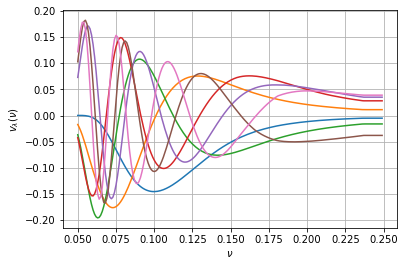

In [286]:
for m in range(7):
    plt.plot(freqs, evecs_gs.T[m])
#plt.yscale('log')
plt.ylabel('$v_\\lambda(\\nu)$')
plt.xlabel('$\\nu$')
plt.grid()

In [21]:
freqs = 1.42/(1+blobs_1d_z)
dlys = np.fft.fftshift(np.fft.fftfreq(len(freqs), np.mean(np.diff(freqs))))

(1e-06, 2.0)

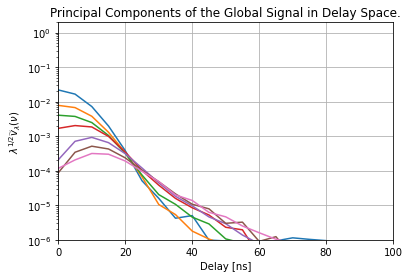

In [291]:
import scipy.signal as signal
for m in range(7):
    wfunc = np.ones(len(freqs))#
    wfunc = signal.blackmanharris(len(freqs))
    plt.plot(dlys, np.fft.fftshift(np.abs(np.fft.ifft(np.fft.fftshift(wfunc * evecs_gs.T[m] * np.sqrt(evals_gs[m]/evals_gs.max()))))))
plt.title('Principal Components of the Global Signal in Delay Space.')
plt.xlim(0,100)
plt.grid()
plt.xlabel('Delay [ns]')
plt.ylabel('$\\lambda^{1/2} \widetilde{v}_\\lambda(\\nu)$')
plt.yscale('log')
plt.ylim(1e-6, 2e0)

Generate some EDGEs eigenvectors

In [300]:
tau_range = np.linspace(5,13, 10)
amp_range = np.linspace(400, 1000, 10)
nu0_range = np.linspace(78, 78.6, 10)
w_range = np.linspace(20, 21.5, 10)
def t21_func(freqs, tau, A, nu0, w):
    B = 4 * (freqs - nu0) ** 2. / (w ** 2.)\
    * np.log(-np.log((1+np.exp(-tau))/2)/tau)
    t_profile = -A * (1 - np.exp(-tau *np.exp(B))/(1-np.exp(-tau)))
    return t_profile
samples = np.zeros((len(tau_range)*len(amp_range)*len(nu0_range)*len(w_range),
                    len(freqs)))
counter = 0
for tau in tau_range:
    for amp in amp_range:
        for w in w_range:
            for nu0 in nu0_range:
                samples[counter] = t21_func(freqs, tau, amp, nu0/1e3, w/1e3)
                counter += 1

                

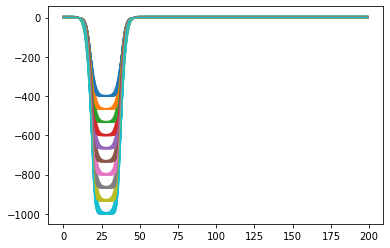

In [301]:
for profile in samples[::100]:
    plt.plot(profile)

In [302]:
cov_edges = np.cov(samples.T)
cov_edges += np.identity(cov_edges.shape[0]) * 1e-14 * np.trace(cov_edges)

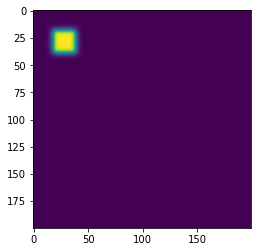

In [303]:
plt.imshow(cov_edges)

In [304]:
evals_edges, evecs_edges = np.linalg.eig(cov_edges)


Casting complex values to real discards the imaginary part


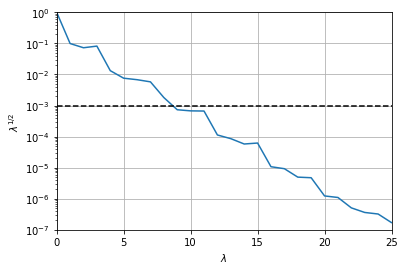

In [305]:
plt.plot(np.sqrt(evals_edges.T) / np.sqrt(evals_edges).max())
plt.yscale('log')
plt.ylim(1e-7,1e0)
plt.xlim(0,25)
plt.grid()
plt.xlim()
plt.ylabel('$\\lambda^{1/2}$')
plt.xlabel('$\\lambda$')
plt.axhline(1e-3, ls='--', color='k')

Casting complex values to real discards the imaginary part


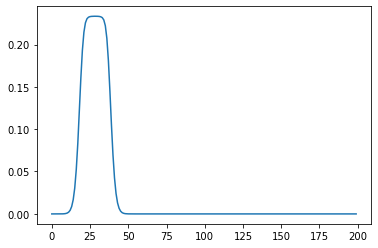

In [317]:
plt.plot(np.fftevals_edges[0]/evals_edges.max() * evecs_edges.T[0] )


Text(0.5, 1.0, 'EDGES PCs in Delay Space')

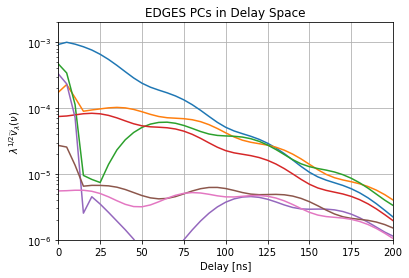

In [322]:
import scipy.signal as signal
for m in range(7):
    normed_evec = evecs_edges.T[m] * np.sqrt(evals_edges[m] / evals_edges.max())
    #wfunc = np.ones(len(freqs))#
    wfunc = signal.blackmanharris(len(freqs))
    plt.plot(dlys, 
             np.fft.fftshift(np.abs(np.fft.ifft(np.fft.fftshift(wfunc * normed_evec)))))
    
plt.xlim(0,200)
plt.grid()
plt.xlabel('Delay [ns]')
plt.ylabel('$\\lambda^{1/2} \widetilde{v}_\\lambda(\\nu)$')
plt.yscale('log')
plt.ylim(1e-6, 2e-3)
plt.title('EDGES PCs in Delay Space')

In [29]:
def delay_filter(freqs, dly=10):
    xg, yg = np.meshgrid(freqs, freqs)
    return np.linalg.inv(np.sinc(2 * (xg - yg) * dly) * 1e6 +  np.identity(len(freqs)))

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


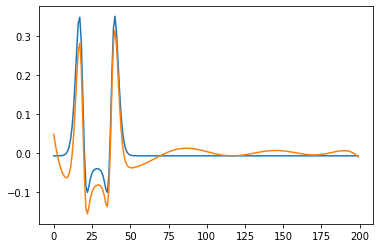

In [30]:
plt.plot(evecs.T[1])
plt.plot(delay_filter(freqs) @ evecs.T[1])

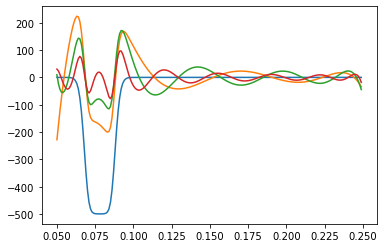

In [31]:
plt.plot(freqs, t21_func(freqs, 7.5, 500, 78/1e3, 20.5/1e3))
for dly in [5, 10, 20,]:
    plt.plot(freqs,
             delay_filter(freqs, dly) @ t21_func(freqs, 7.5, 500, 78/1e3, 20.5/1e3))

In [32]:
from pyuvdata import uvbeam

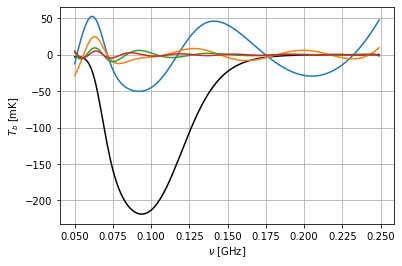

In [33]:
plt.plot(freqs, models_acceptable[15], color='k')
for dly in [1, 5, 10, 20,]:
    plt.plot(freqs,
             delay_filter(freqs, dly) @ models_acceptable[15], label='$\\tau = %d ns')
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [mK]')
plt.grid()

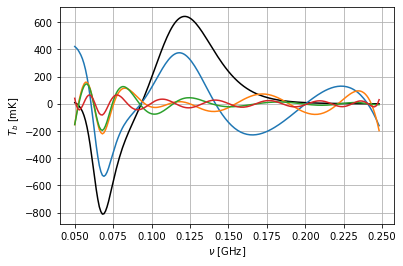

In [34]:
plt.plot(freqs[:-1], np.diff(models_acceptable[15]) / np.diff(np.log(freqs)), color='k')
for dly in [1, 5, 10, 20,]:
    plt.plot(freqs[:-1],
             delay_filter(freqs[:-1], dly) @  np.diff(models_acceptable[15]) / np.diff(np.log(freqs)), label='$\\tau = %d ns')
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [mK]')
plt.grid()

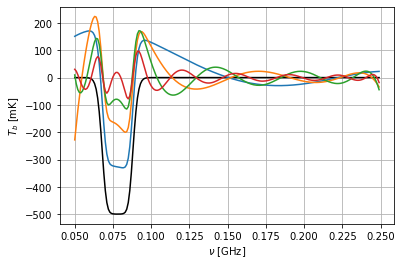

In [35]:
plt.plot(freqs, t21_func(freqs, 7.5, 500, 78/1e3, 20.5/1e3), color='k')
for dly in [1, 5, 10, 20,]:
    plt.plot(freqs,
             delay_filter(freqs, dly) @ t21_func(freqs, 7.5, 500, 78/1e3, 20.5/1e3))
    
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [mK]')
plt.grid()

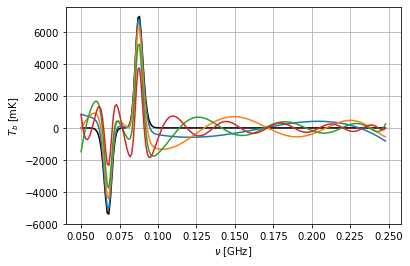

In [36]:
plt.plot(freqs[:-1], np.diff(t21_func(freqs, 7.5, 500, 78/1e3, 20.5/1e3)) / np.diff(np.log(freqs)), color='k')
for dly in [1, 5, 10, 20,]:
    plt.plot(freqs[:-1],
             delay_filter(freqs[:-1], dly) @ np.diff(t21_func(freqs, 7.5, 500, 78/1e3, 20.5/1e3)) /  np.diff(np.log(freqs)))
    
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [mK]')
plt.grid()

In [37]:
from pyuvdata import UVBeam
import glob

In [210]:
uvb = UVBeam()
beamfiles = sorted(glob.glob('/home/aaronew/science/CST/single_vivaldi_stripped_down/Export/Farfield/*.txt'))
print(len(beamfiles))
beamfiles = beamfiles[-50:] + beamfiles[:-50]

201


In [211]:
uvb.read_cst_beam(beamfiles, rotate_pol=True, telescope_name='HERA',
                  feed_name='Vivaldi', feed_version='v0', model_name='barebones', model_version='v0',
                  history='null', x_orientation='north', reference_impedance=100,
                  frequency=np.linspace(50e6, 250e6, 201))

In [212]:
uvb.interpolation_function='az_za_simple'

In [214]:
import copy

In [215]:
uvb_not_interpolated=copy.deepcopy(uvb)
uvb.to_healpix(nside=16)

In [220]:
#del beamcub_ni

In [221]:
beamcube_ni = uvb_not_interpolated.data_array.squeeze()[0]

In [98]:
uvb.data_array.shape

(1, 1, 2, 201, 3072)

In [100]:
from pygsm import GlobalSkyModel
import healpy as hp

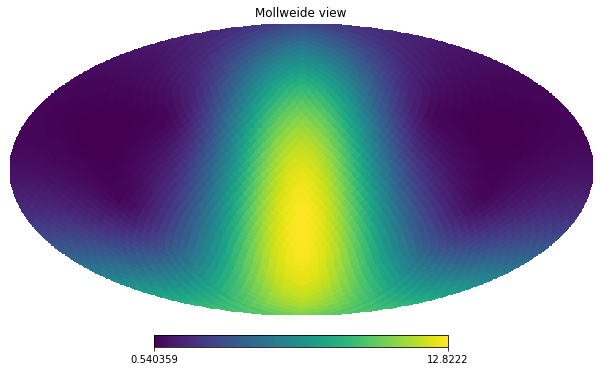

In [148]:
rot2 = hp.Rotator(rot=[180, 0, 0])
rot1 = hp.Rotator(rot=[0, -30, 0])
hp.mollview(rot2.rotate_map_pixel(\
            rot1.rotate_map_pixel(uvb.data_array[0,0,0,0,:])))

In [104]:
nside = 16
gsmcube = np.zeros((len(freqs), hp.nside2npix(nside)))


In [156]:
freqs.max()

0.249

In [107]:
mygsm = GlobalSkyModel(freq_unit='GHz')
for fnum, f in enumerate(freqs):
    gsmslice = mygsm.generate(f)
    gsmcube[fnum] = hp.ud_grade(gsmslice, nside)
    

In [171]:
gsm_fullres = np.asarray([mygsm.generate(f) for f in freqs])

In [152]:
beamcube = uvb.data_array.squeeze()[0]
beamcube = beamcube / beamcube.max()

In [150]:
thetas, phis = hp.pix2ang(nside, range(beamcube.shape[1]))

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


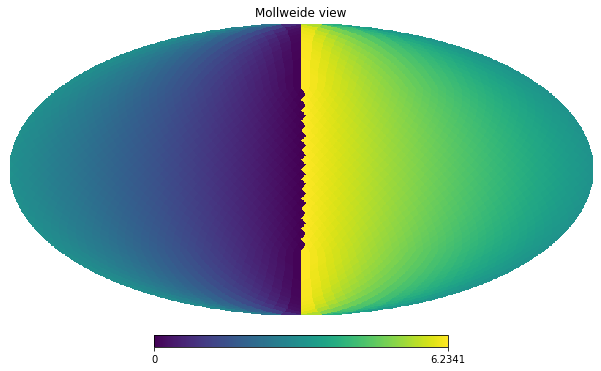

In [151]:
hp.mollview(phis)

In [154]:
beamcube.shape

(201, 3072)

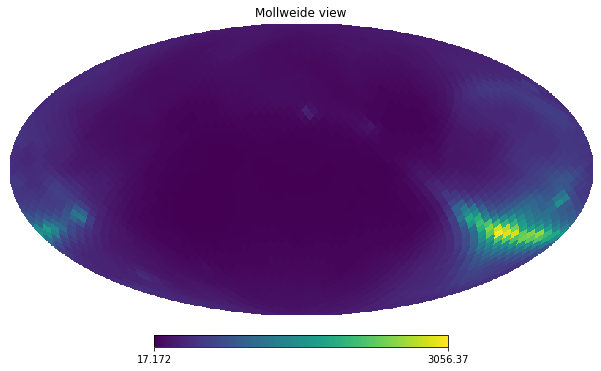

In [161]:
rot_ge = hp.Rotator(coord=['G','C'])
lsts = np.arange(0, 360, 1)
LAT = -30.
spectra = np.zeros((len(freqs), len(lsts)))
for integration,lst in enumerate(lsts):
    gsmrotated = np.zeros_like(gsmcube)
    for chan,mapslice in enumerate(gsmcube):
        # transform to celestial coordinates.
        gsmrotated[chan] = rot_ge.rotate_map_pixel(mapslice)
        # rotate 
        rot2 = hp.Rotator(rot=[-lst, 0, 0])
        rot1 = hp.Rotator(rot=[0, -LAT, 0])
        gsmrotated[chan] = rot2.rotate_map_pixel(\
                           rot1.rotate_map_pixel(gsmrotated[chan]))
        # set everything with phi between 90 and 270 equal to 300K blackbody
    gsmrotated[:, (phis<=np.pi/2) & (phis>=3 * np.pi/2.)] = 300.
    if integration == 0:
        hp.mollview(gsmrotated[0]*beamcube[0])
    spectra[:, integration] = np.sum(gsmrotated * beamcube[:-1], axis=1)

In [162]:
np.savez('spectra_gsm_simple_vivaldi.npz', data=spectra, freqs=freqs, lsts=lsts*12/180.)

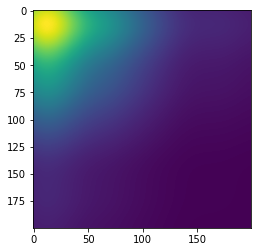

In [164]:
plt.imshow(np.cov(spectra))

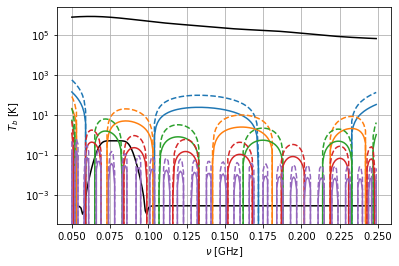

In [179]:
plt.plot(freqs, spectra[:, 0], color='k')
plt.plot(freqs, np.abs(1e-3*t21_func(freqs, 7.5, 500, 78/1e3, 20.5/1e3)), color='k')
for dly in [1, 5, 10, 20, 100]:
    #plt.plot(freqs,
    #         delay_filter(freqs, dly) @ t21_func(freqs, 7.5, 500, 78/1e3, 20.5/1e3))
    l0=plt.plot(freqs,delay_filter(freqs, dly) @ gsm_fullres[:,10] )[0]
    plt.plot(freqs, delay_filter(freqs, dly) @ gsmcube[:, 10], 
             color=l0.get_color(), ls='--')
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()
plt.yscale('log')

In [184]:
gsm_fullres.shape

(200, 3145728)

In [222]:
beamcube_ni = beamcube_ni.reshape((201, 181*360))

In [223]:
cov_gsm = np.cov(gsm_fullres)
cov_bsm = np.cov(beamcube)
cov_bsm_ni = np.cov(beamcube_ni)

In [226]:
evals_gsm, evecs_gsm = np.linalg.eig(cov_gsm)
evals_bsm, evecs_bsm = np.linalg.eig(cov_bsm)
evals_bsm_ni, evecs_bsm_ni = np.linalg.eig(cov_bsm_ni)

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


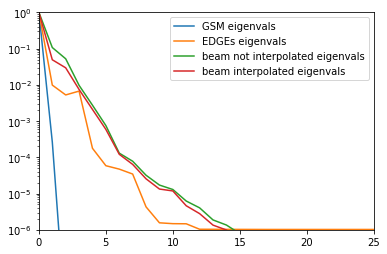

In [228]:
plt.plot(evals_gsm/evals_gsm.max(), label='GSM eigenvals')
plt.plot(evals_edges/evals_edges.max(), label='EDGEs eigenvals')
plt.plot(evals_bsm_ni/evals_bsm_ni.max(), label='beam not interpolated eigenvals')
plt.plot(evals_bsm/evals_bsm.max(), label='beam interpolated eigenvals')

plt.yscale('log')
plt.xlim(0,25)
plt.ylim(1e-6, 1)
plt.legend()

Try an unhealpixified beamcube

(0.0001, 100.0)

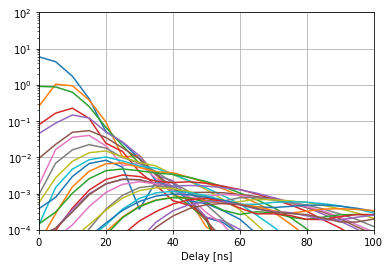

In [234]:
import scipy.signal as signal
for m in range(26):
    wfunc = np.ones(len(freqs))#
    wfunc = signal.blackmanharris(len(freqs))
    plt.plot(dlys, np.fft.fftshift(np.abs(np.fft.ifft(np.fft.fftshift(wfunc * evecs_bsm_ni.T[m][:-1] * np.sqrt(evals_bsm_ni[m]))))))
    
plt.xlim(0,100)
plt.grid()
plt.xlabel('Delay [ns]')
plt.yscale('log')
plt.ylim(1e-4, 1e2)

Text(0, 0.5, 'Zenith Delay-Response of Beam')

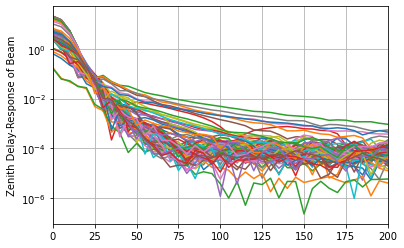

In [338]:
 for m in range(0,beamcube_ni.shape[1], 1000):
    plt.plot(dlys,np.abs(np.fft.fftshift(np.fft.ifft(wfunc*beamcube_ni[:-1, m]))))
#plt.plot(dlys,beamcube_ni[:-1, 100])
plt.xlim(0,200)
plt.yscale('log')
plt.grid()
plt.ylabel('Zenith Delay-Response of Beam')

In [324]:
beam_filter = np.linalg.inv(np.identity(len(freqs)) + cov_bsm_ni[:-1,:-1] * 1e9)

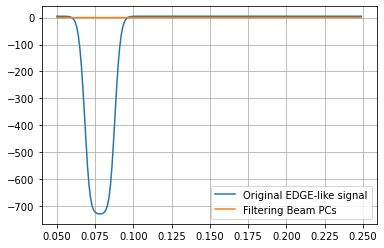

In [334]:
plt.plot(freqs, samples[500], label='Original EDGE-like signal')
plt.plot(freqs, beam_filter @ samples[500], label='Filtering Beam PCs')
plt.grid()
plt.legend()

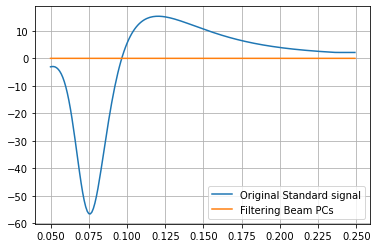

In [376]:
plt.plot(freqs, models_acceptable[55], label='Original Standard signal')
plt.plot(freqs, beam_filter @ models_acceptable[55], label='Filtering Beam PCs')
plt.grid()
plt.legend()

Try taking FFT along delay axis and then regrid to healpix

In [339]:
uvb_not_interpolated.data_array.shape

(1, 1, 2, 201, 181, 360)

In [355]:
uvb_fft = copy.deepcopy(uvb_not_interpolated)
wf = signal.blackmanharris(201)
wf /= wf.mean()
uvb_fft.data_array = np.abs(np.fft.fftshift(np.fft.ifft(np.fft.fftshift(uvb_fft.data_array * wf[None, None, None, :, None, None], axes=3), axis=3), axes=3))
uvb_fft.to_healpix(nside=16)

In [347]:
np.where(dlys==50.)[0][0]

110

In [350]:
uvb.data_array.shape

(1, 1, 2, 201, 3072)

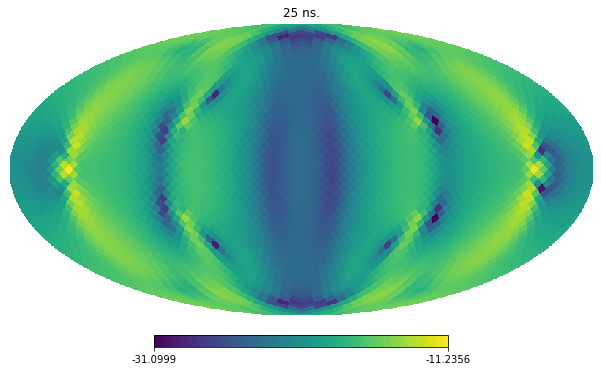

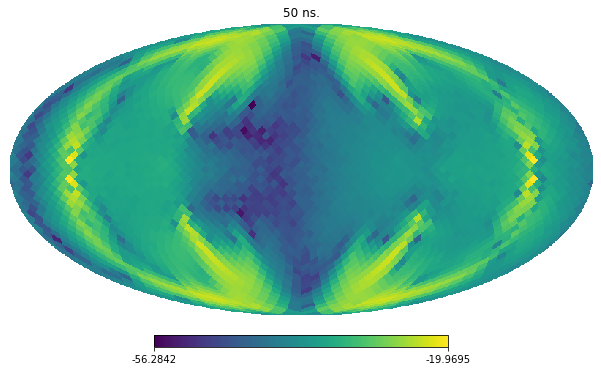

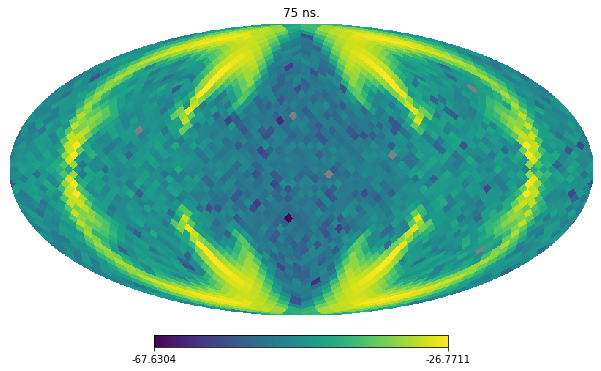

In [364]:
zd_slice = uvb_fft.data_array.squeeze()[0][np.where(dlys==0.)[0][0]]
hp.mollview(10*np.log10(uvb_fft.data_array.squeeze()[0][np.where(dlys==25.)[0][0]]/zd_slice),
            rot=[180,0,0], title='25 ns.')
hp.mollview(10*np.log10(uvb_fft.data_array.squeeze()[0][np.where(dlys==50.)[0][0]]/zd_slice), 
            rot=[180,0,0], title='50 ns.')
hp.mollview(10*np.log10(uvb_fft.data_array.squeeze()[0][np.where(dlys==75.)[0][0]]/zd_slice), 
            rot=[180,0,0], title='75 ns.')
            


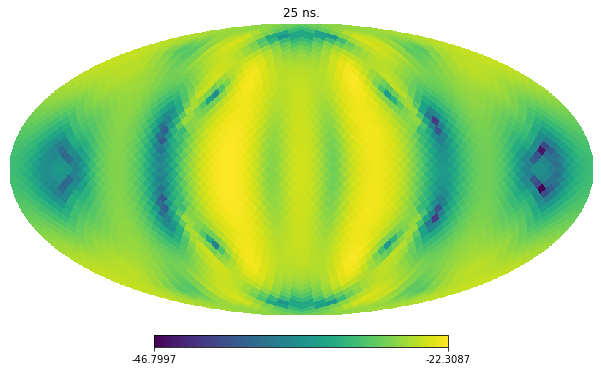

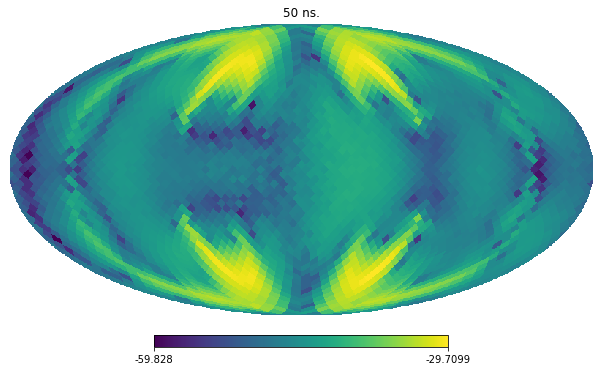

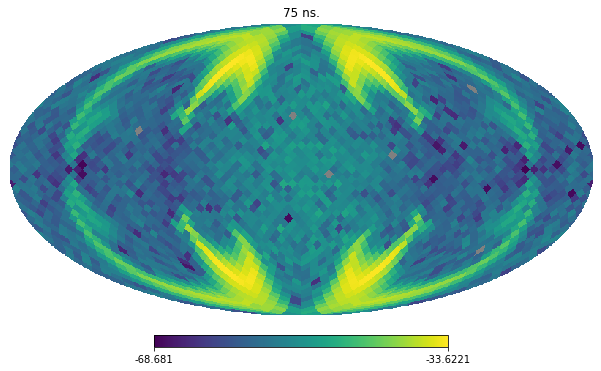

In [365]:
zd_slice = uvb_fft.data_array.squeeze()[0][np.where(dlys==0.)[0][0]].max()
hp.mollview(10*np.log10(uvb_fft.data_array.squeeze()[0][np.where(dlys==25.)[0][0]]/zd_slice),
            rot=[180,0,0], title='25 ns.')
hp.mollview(10*np.log10(uvb_fft.data_array.squeeze()[0][np.where(dlys==50.)[0][0]]/zd_slice), 
            rot=[180,0,0], title='50 ns.')
hp.mollview(10*np.log10(uvb_fft.data_array.squeeze()[0][np.where(dlys==75.)[0][0]]/zd_slice), 
            rot=[180,0,0], title='75 ns.')
            


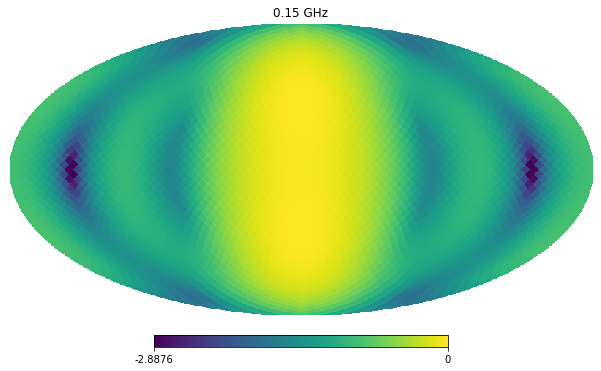

In [373]:
hp.mollview(np.log10(uvb.data_array.squeeze()[0][100] / uvb.data_array.squeeze()[0][100].max()), rot=[180,0,0],
            title=f'{freqs[100]} GHz')


If the high delay PCs are coming from the side-lobe region and may be numerical, perhaps we should try filtering with PCs of the beam within ten degrees of zenith. 

In [387]:
uvb_zen.data_array.shape

(1, 1, 2, 201, 181, 360)

In [392]:
uvb_not_interpolated.axis2_array.shape

(181,)

In [409]:
ten_deg_selection_theta = (uvb_not_interpolated.axis2_array*180/np.pi >= 90-30) & (uvb_not_interpolated.axis2_array*180/np.pi <= 90+30) 
ten_deg_selection_phi = (uvb_not_interpolated.axis1_array*180/np.pi>=180-10) & (uvb_not_interpolated.axis1_array*180/np.pi<=180+10)
uvb_zen = copy.deepcopy(uvb_not_interpolated)
uvb_zen.data_array[:,:,: , :, ~ten_deg_selection_theta, :] = 0.
uvb_zen.data_array[:,:,: , :, :, ~ten_deg_selection_phi] = 0.

uvb_zhp = uvb_zen.to_healpix(nside=16, inplace=False)

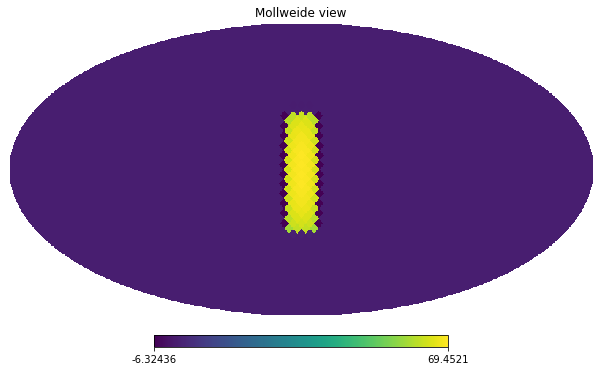

In [410]:
hp.mollview(uvb_zhp.data_array.squeeze()[0][150], rot=[180,0,0])

In [420]:
d2use = uvb_zen.data_array[:,:,: , :, ten_deg_selection_theta, :]
d2use = d2use[:,:,: , :, :, ten_deg_selection_phi].squeeze()
d2use.shape
cov_beam_central = np.cov(d2use.squeeze()[0].reshape(201, 60*21))
evals_cbc, evecs_cbc = np.linalg.eig(cov_beam_central + 1e-14 * np.identity(201)*np.trace(cov_beam_central))

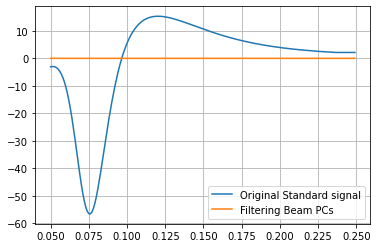

In [415]:

beam_filterc = np.linalg.inv(np.identity(len(freqs)) + cov_beam_central[:-1,:-1] * 1e9)
plt.plot(freqs, models_acceptable[55], label='Original Standard signal')
plt.plot(freqs, beam_filterc @ models_acceptable[55], label='Filtering Beam PCs')
plt.grid()
plt.legend()

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


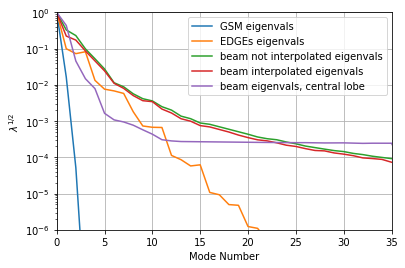

In [423]:
plt.plot(np.sqrt(evals_gsm/evals_gsm.max()), label='GSM eigenvals')
plt.plot(np.sqrt(evals_edges/evals_edges.max()), label='EDGEs eigenvals')
plt.plot(np.sqrt(evals_bsm_ni/evals_bsm_ni.max()), label='beam not interpolated eigenvals')
plt.plot(np.sqrt(evals_bsm/evals_bsm.max()), label='beam interpolated eigenvals')
plt.plot(np.sqrt(evals_cbc/evals_cbc.max()), label='beam eigenvals, central lobe')
plt.ylabel('$\\lambda^{1/2}$')
plt.xlabel('Mode Number')
plt.yscale('log')
plt.xlim(0,35)
plt.ylim(1e-6, 1)
plt.legend()
plt.grid()